## #1 Problem Motivation:
Before we delve deeper into the dataset, it is important to define the problem, the objectives of the problem and the probable solution(s) which we sought to achieve through this project.

The problem is by a Portuguese bank which intends to predict whether a customer (which it is yet to contact) will subscribe to its term deposits. If this information is known beforehand, the target audience (Population from the 4P's of marketing) can be narrowed or optimized so as to achieve better conversion of the product/service offered through the campaign.

Before we move further, we will define **'Term Deposit'**. Term deposit is nothing but an amount deposited by a customer in a bank/financial institution which in return would provide interest on the amount deposited. These are usually short term deposits, however they are for fixed term and thus provide higher interest rates as compared to traditional liquid saving accounts where customers can withdraw amount at any instance.

More information on this topic can be viewed at https://www.investopedia.com/terms/t/termdeposit.asp 

Summarizing, this project deals with predicting whether a customer will susbscribe to the term deposit offered by the bank based on characteristics of customer which are yet to be seen. At the outset, the problem can be conceptualized as a `Binary Classification` Problem with the output - A Yes or No decision to the subscription of the offering. 

In [284]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math

# SVM
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, f1_score,recall_score, precision_score
from sklearn.decomposition import PCA
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from urllib.request import urlretrieve


# Random Forests
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
pd.set_option('display.max_columns', None)

In [189]:
#Reading the data
urlretrieve("https://drive.google.com/uc?export=download&id=1gtd1nA87omwQsyqe31yDPTTlR2cGo2dQ", "data.csv")
df = pd.read_csv("data.csv", delimiter = ";")

## #2 Exploratory Data Analysis

We will now proceed with the `EDA` part of the ML project. We will first look at the head of the data, describe the data types, analyse the Categorical vs Numerical variables, and check for null values (and impute the data if any null values).
We will also rename the columns for better visualization.

In [190]:
# Shape of the dataset
df.shape

(41188, 21)

In [191]:
# Read the first 5 rows of the dataframe
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [192]:
# Describe the data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [193]:
# Sum up all the NaN values for each feature 
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [194]:
# Show the type of the features. "Int64" and "Float64" types indicate Continuous Features, "object" type indicates Categorical Features 
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [195]:
# Print out the feature names and the number of unique values each feature has. If the number is lesser than 10, print out the values.
for column in df.columns:
    no_unique_values = df[column].nunique()
    
    if no_unique_values <= 10:
        unique_values = df[column].unique()
        print(f"{column}: {no_unique_values}, {unique_values}") 
    else:
        print(f"{column}: {no_unique_values}")

age: 78
job: 12
marital: 4, ['married' 'single' 'divorced' 'unknown']
education: 8, ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: 3, ['no' 'unknown' 'yes']
housing: 3, ['no' 'yes' 'unknown']
loan: 3, ['no' 'yes' 'unknown']
contact: 2, ['telephone' 'cellular']
month: 10, ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: 5, ['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544
campaign: 42
pdays: 27
previous: 8, [0 1 2 3 4 5 6 7]
poutcome: 3, ['nonexistent' 'failure' 'success']
emp.var.rate: 10, [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx: 26
cons.conf.idx: 26
euribor3m: 316
nr.employed: 11
y: 2, ['no' 'yes']


In [196]:
# Rename the Y label to "Label"
df.rename(columns={ 'y': "Label" }, inplace= True)

In [197]:
# The value counts of the label
df.Label.value_counts()

no     36548
yes     4640
Name: Label, dtype: int64

`Conclusion from EDA`:
1. There are no Null values in any of the columns. Hence there is not need for further imputation
2. There are 10 Numberical features and 10 Categorical features and 1 Label
3. The Y label indicates a class imbalance.

## #3 Data Visualization

Now that we have conducted the basic EDA of the dataset, we can proceed with looking at how the data is distributed. We will look at the Correlation of the features, the Histograms of the categorical variables, Boxplots for the numerical variables, and finally the pairplot to guage the skewness of the data.

In [198]:
# We're storing the categorial features in a list to plot the distribution of the values together
categorical = [feature[0] for feature in df.dtypes.items() if ( feature[1] == "object" and feature[0] != 'Label')] 
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [199]:
# We're storing the numerical in a list to plot the distribution of the values together
numerical = [feature[0] for feature in df.dtypes.items() if ( feature[1] == "int64" or feature[1] == "float64" and feature[0] != 'Label')] 
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [200]:
#Rename values in the categorical columns for better view in the plot
df_plot = df.copy()
df_plot.job = df.job.replace({ "management": "m", 
                        "blue-collar" : "b",
                        "technician" : "t",   
                        "admin." : "a",
                        "services" : "s",
                        "retired" : "r",         
                        "self-employed" : "se",
                        "entrepreneur" : "e",    
                        "unemployed" : "u",       
                        "housemaid" : "h"   ,   
                        "student" : "s", 
                        "unknown" : "unk"   })

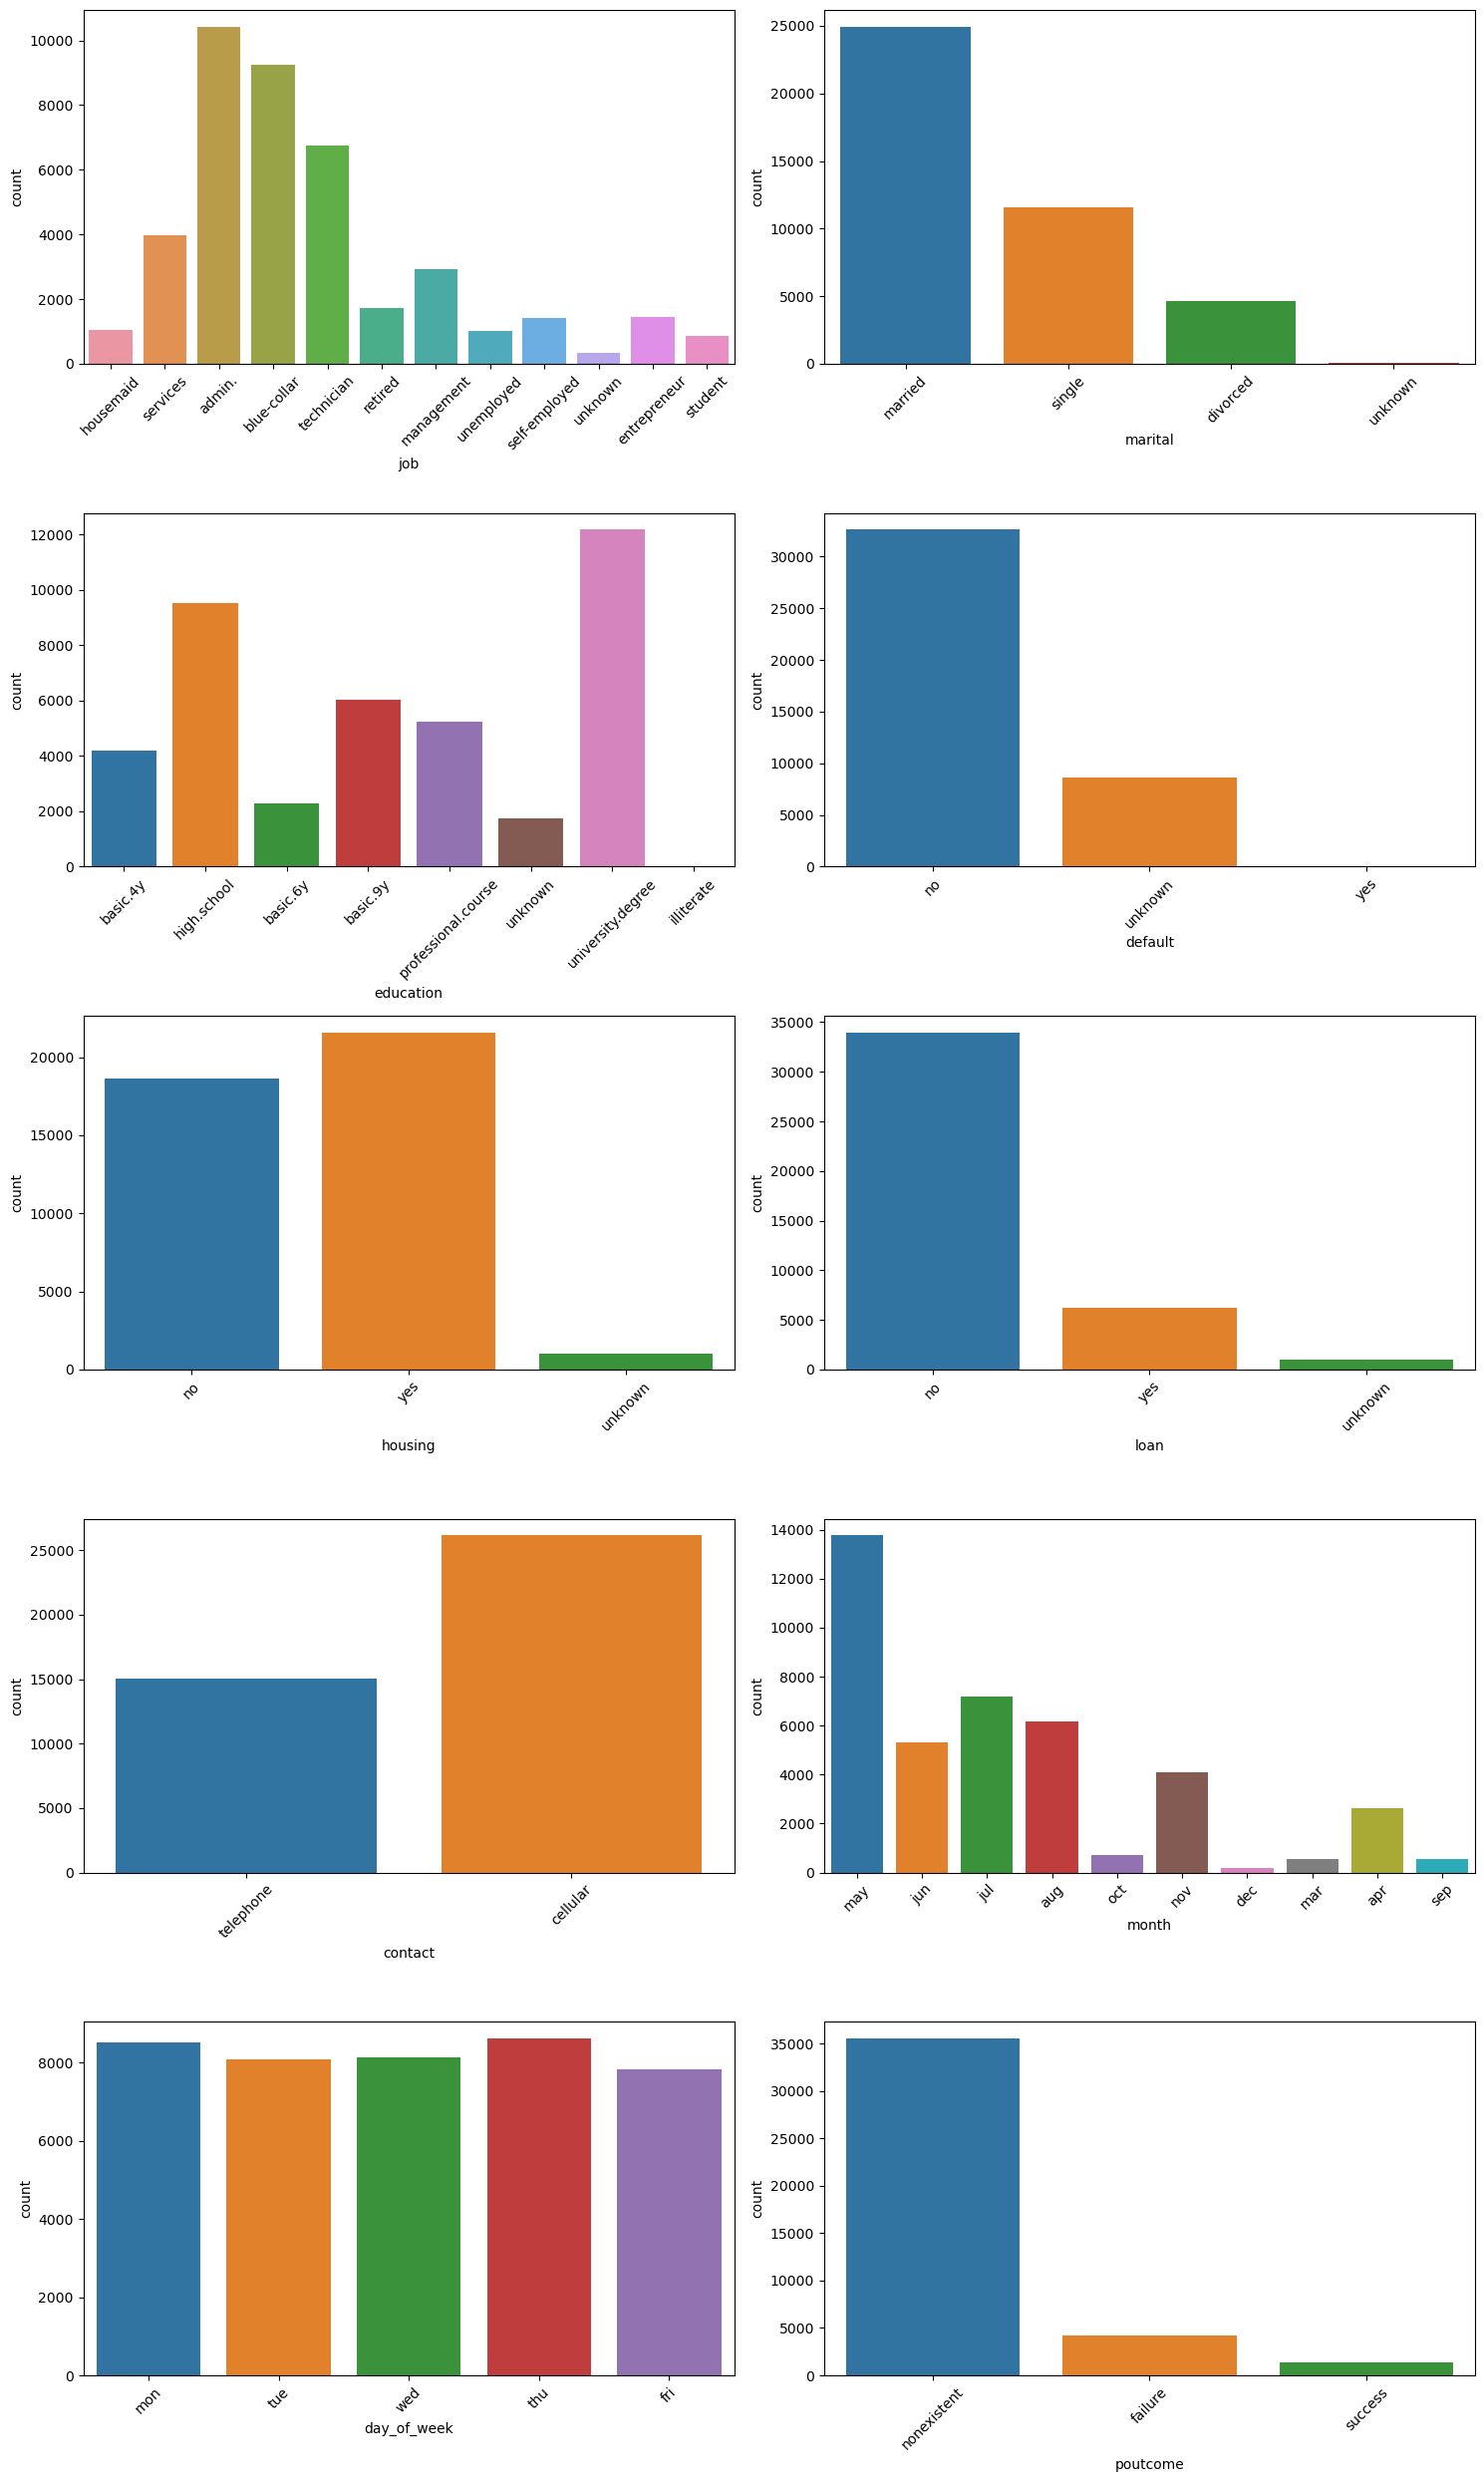

In [201]:
cat_features = len(categorical)
cat_cols = 2
cat_rows = math.ceil(cat_features / cat_cols)
# Create a grid of subplots using Seaborn
fig, axes = plt.subplots(cat_rows, cat_cols, figsize=(15, 5*cat_rows))
for i, cat_feature in enumerate(categorical):
    row, col = divmod(i, cat_cols)
    sns.countplot(data=df, x= cat_feature, ax=axes[row, col])
    axes[row, col].tick_params(axis='x', labelrotation=45)
    
for i in range(len(categorical), cat_rows * cat_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

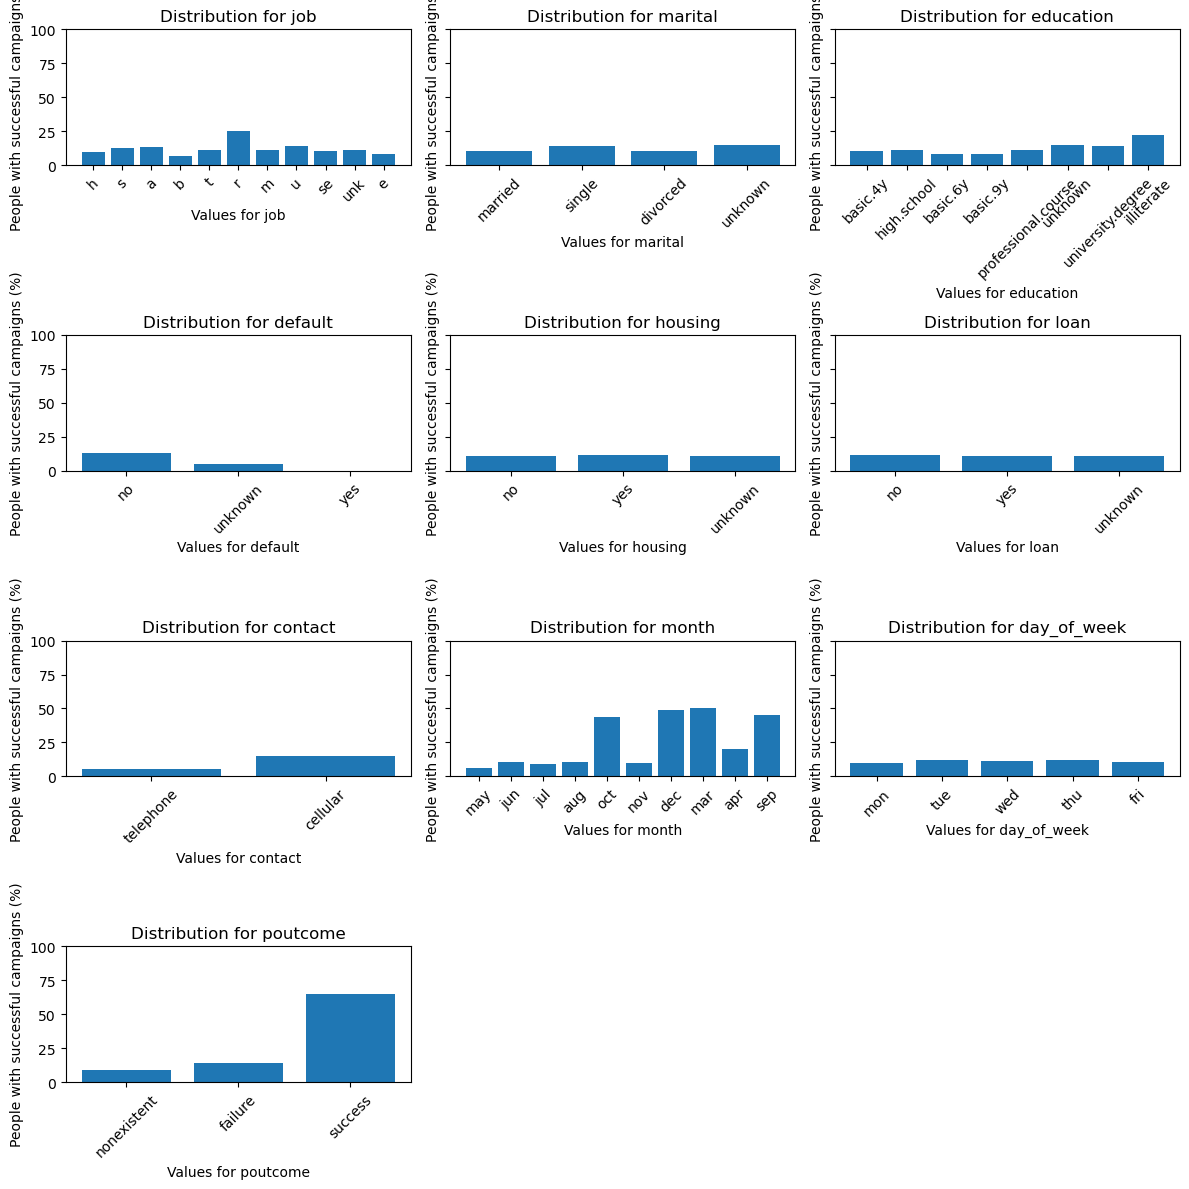

In [202]:
# We will now plot all the 10 categorical variables side by side. X axis would be the categories and Y would be the number of people with a successful campaign
fig, axes = plt.subplots(4,3, sharey=True, figsize=(12,12))
for i, cat in enumerate(categorical):
    ax = axes.flat[i]
    cat_values = [ cat_value for cat_value in df_plot[cat].unique() ] # No NaN values to handle here

    campaign_success = [ len(df_plot[(df_plot[cat] == val) & (df_plot.Label == "yes") ]) / len( df_plot[df_plot[cat] == val]) for val in cat_values]
    # campaign_success = [ len(df_plot[(df_plot[cat] == val) & (df_plot.Label == "yes") ]) / len( df_plot) for val in cat_values]
    #With percentages
    campaign_success = [ x * 100 for x in campaign_success]

    ax.bar([str(x) for x in cat_values], campaign_success)
    ax.set_ylim(0, 100)
    ax.set_xlabel(f"Values for {cat}")
    ax.set_ylabel('People with successful campaigns (%)')
    ax.set_title(f"Distribution for {cat}")
    row, col = divmod(i, 3)
    axes[row, col].tick_params(axis='x', labelrotation=45)


fig.delaxes(axes.flat[-1])
fig.delaxes(axes.flat[-2])
fig.tight_layout()

**Insights**: There are some insights to be drawn from the above visualizations.

1. Customers that are either students or retired professionals are more likely to sign up for the term deposits as compared to other professions.                                     
2. Customers contacted on cellphone are more likely to commit to the subscription as compared to those on telephone
3. Customers who have signed up for previous campaigns are more likely than not to sign up for the campaign and therefore should be definitely approached

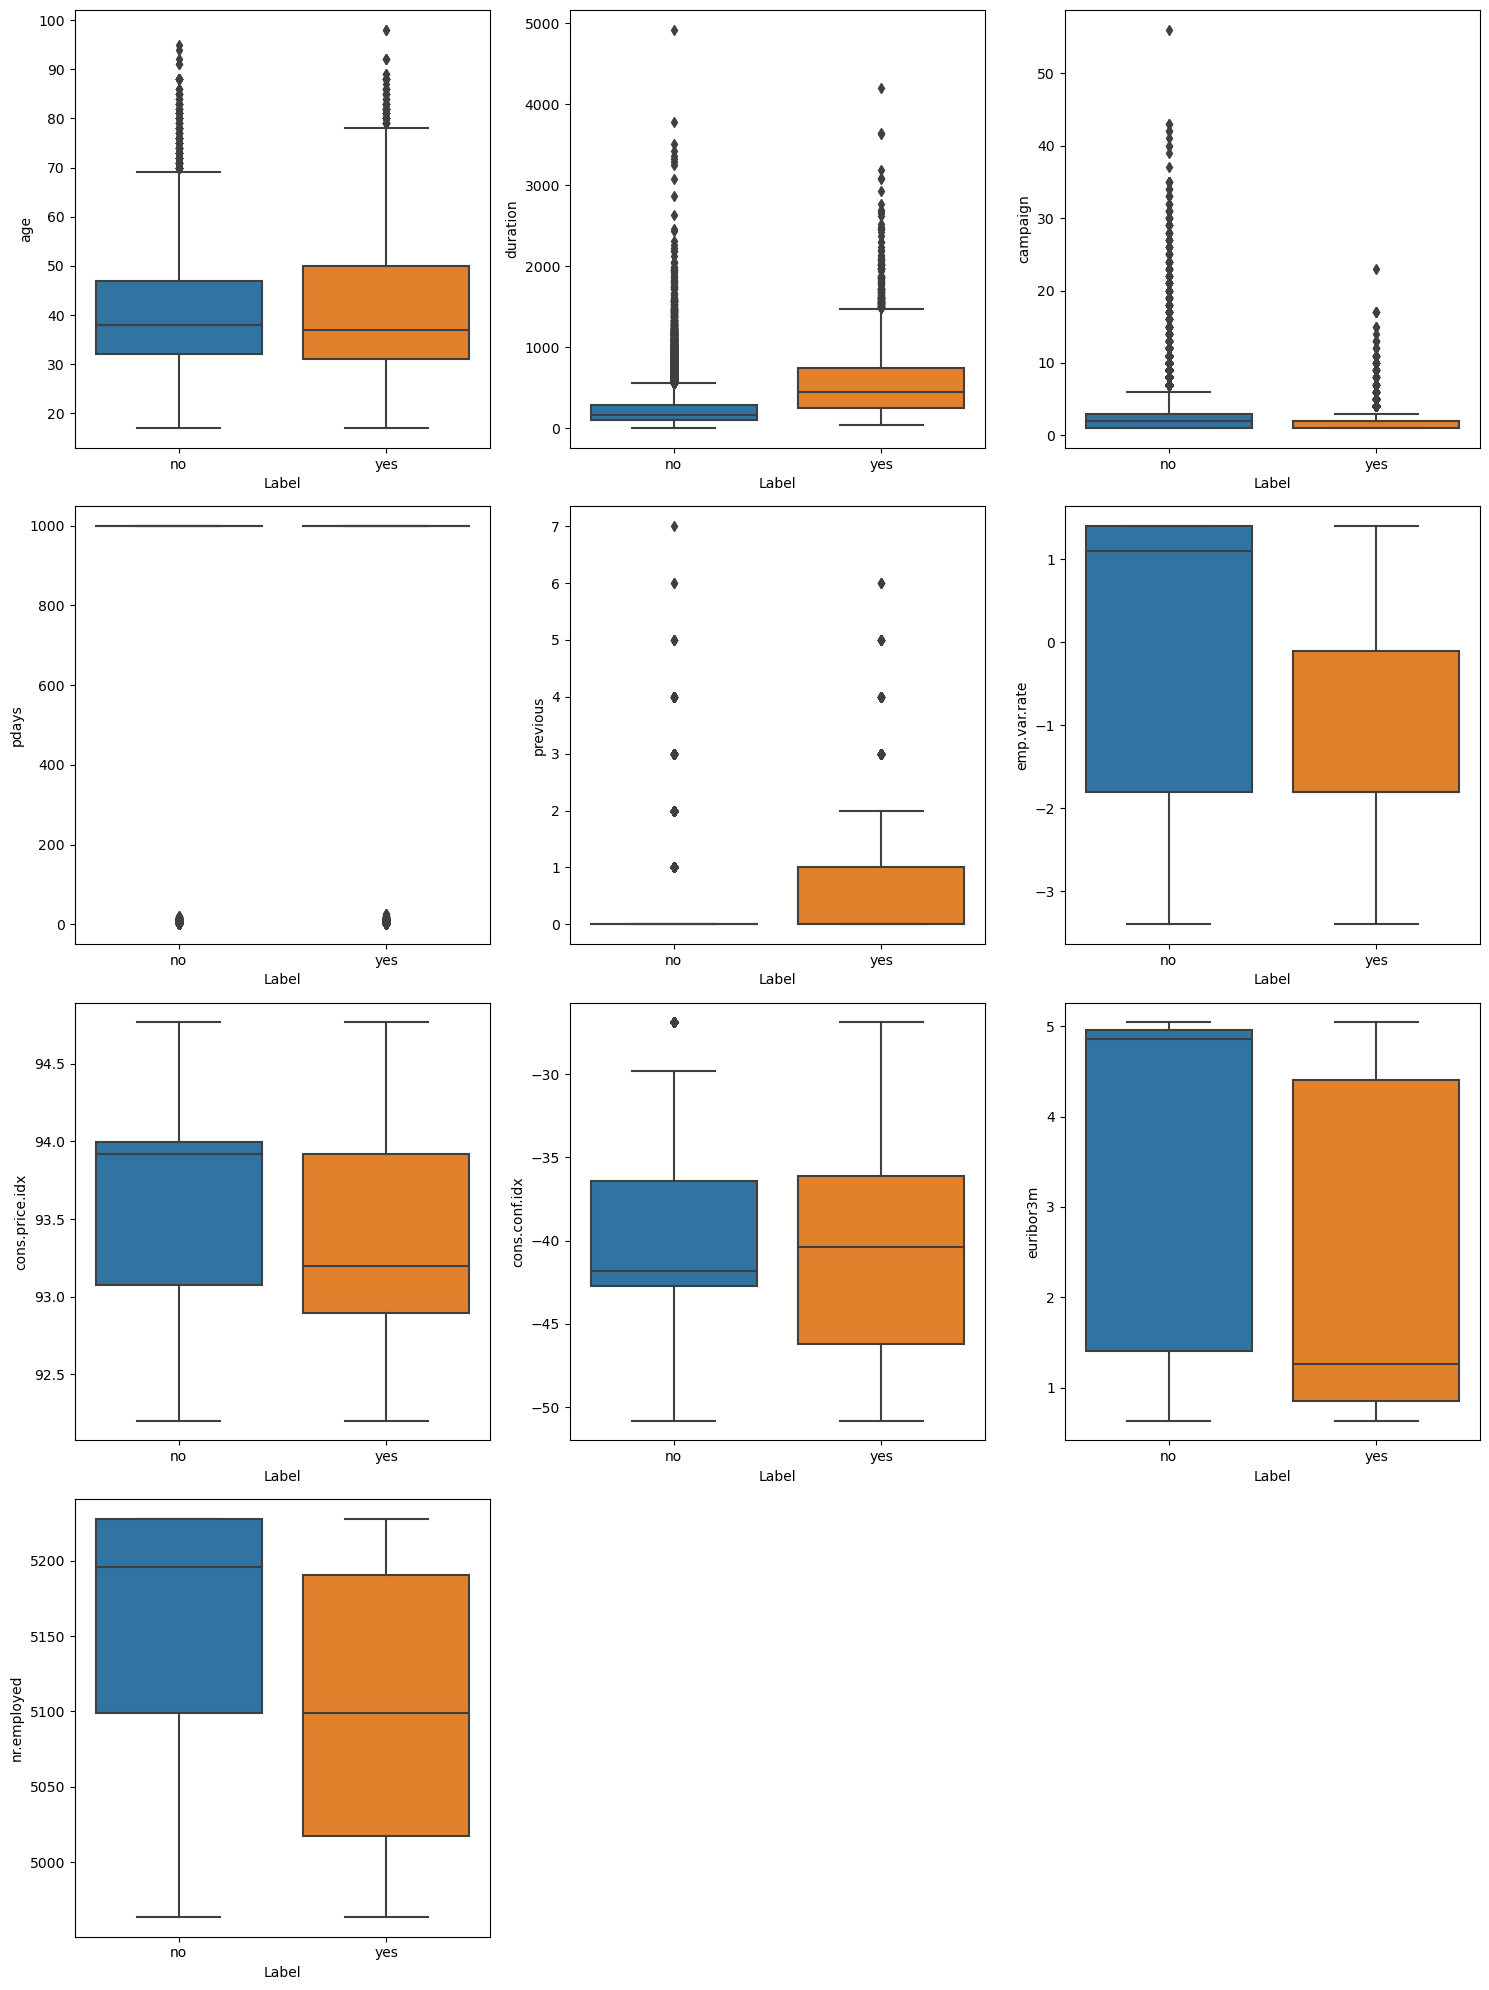

In [203]:
# The box-and-whisker plot plots the distribution of the numerical data compared to the Labels(Y/N)
num_features = len(numerical)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, num_feature in enumerate(numerical):
    row, col = divmod(i, num_cols)
    sns.boxplot(data=df_plot, x = "Label", y= num_feature, ax=axes[row, col])
    
for i in range(len(numerical), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

**Insights**: The following are the insights taken from the numerical data

1. It is noticed that the more the number of times the customer is approached for the camapaign; the more unlikely he is to invest in the deposit. It implies that repeated efforts to convince the customer about the campaign has not yielded positive result.
2. Customers in their 20s and late 60s-70s are more likely to subscribe to the term deposit. This is also in conformity with our finding that students and retired professionals have shown more interest than other professions. However it must also be noted that most of our data has age between 30 to 50, so the sample space may have an impact on these findings.
3. The more the duration of the call, the more the customer is likely to sign up. 

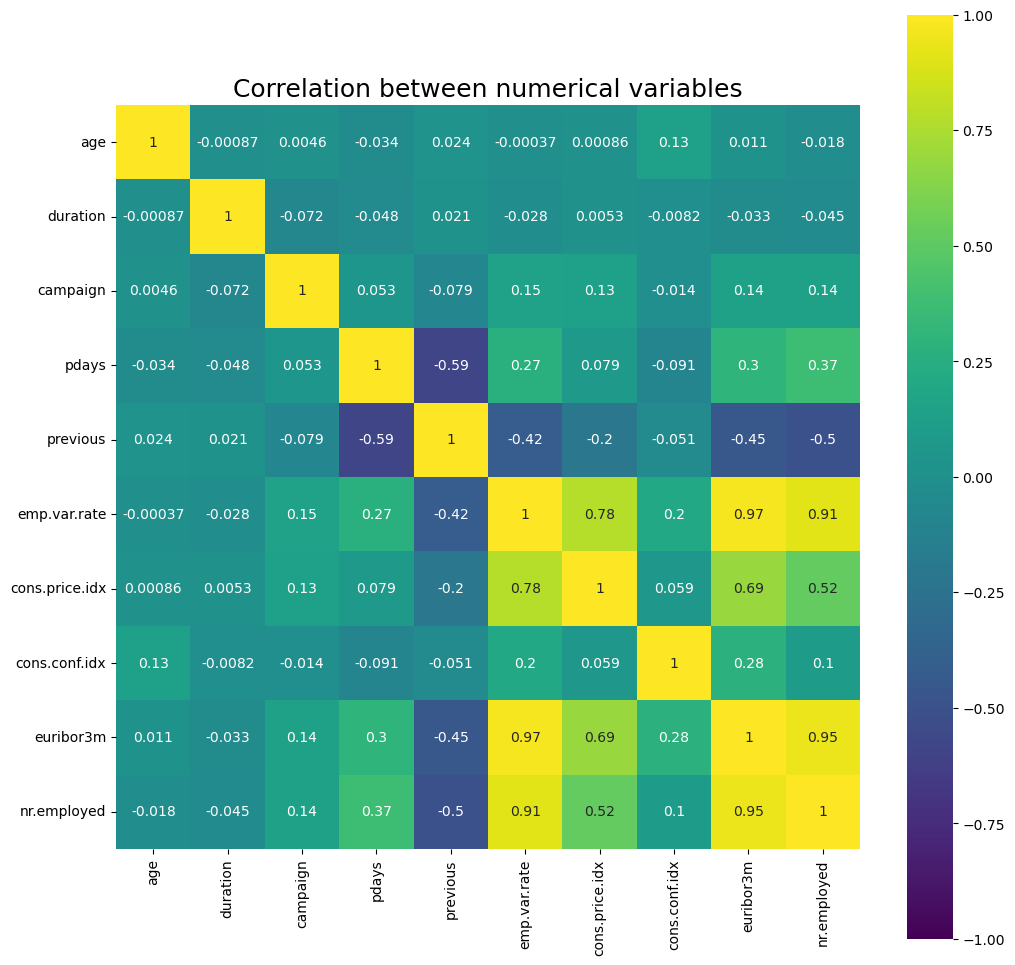

In [204]:
# Draw a correlation plot
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[numerical].corr(), square=True, annot=True, cmap=plt.cm.viridis, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between numerical variables', fontsize=18);

In [205]:
# Do factor analysis to combine features
fac_2c = FactorAnalysis(n_components= 1)
df["soc_eco_factor"] = fac_2c.fit_transform(df[["emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]])
df = df.drop(["emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"], axis = 1)


C:\Users\Atfan\anaconda3\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:297: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


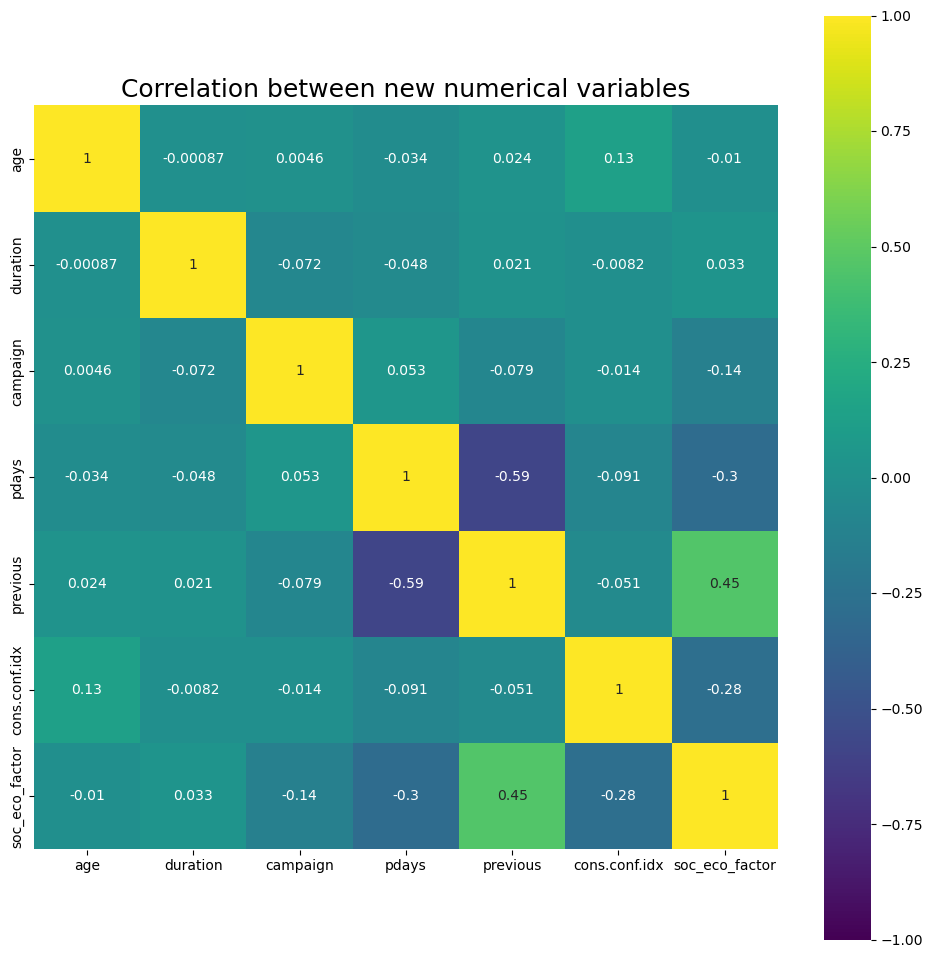

In [206]:
# Check new correlation plot with the combined feature
numerical2 = [numericals for numericals in numerical if numericals not in ["emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"] ] + ["soc_eco_factor"]
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[numerical2].corr(), square=True, annot=True, cmap=plt.cm.viridis, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between new numerical variables', fontsize=18);

<Axes: xlabel='pdays', ylabel='Count'>

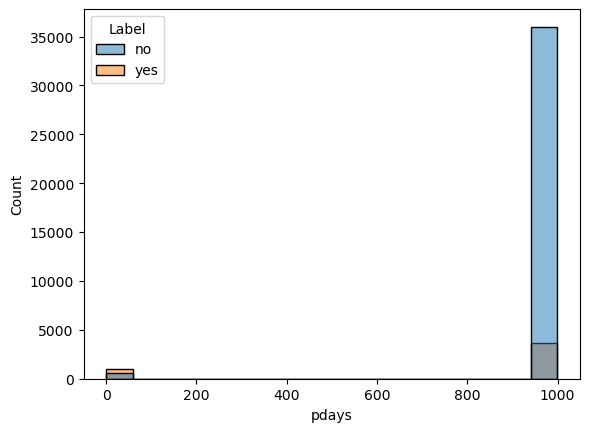

In [207]:
# Taking a look at the pdays column, distributed according to the Label
sns.histplot(data=df,x = 'pdays', hue= 'Label')

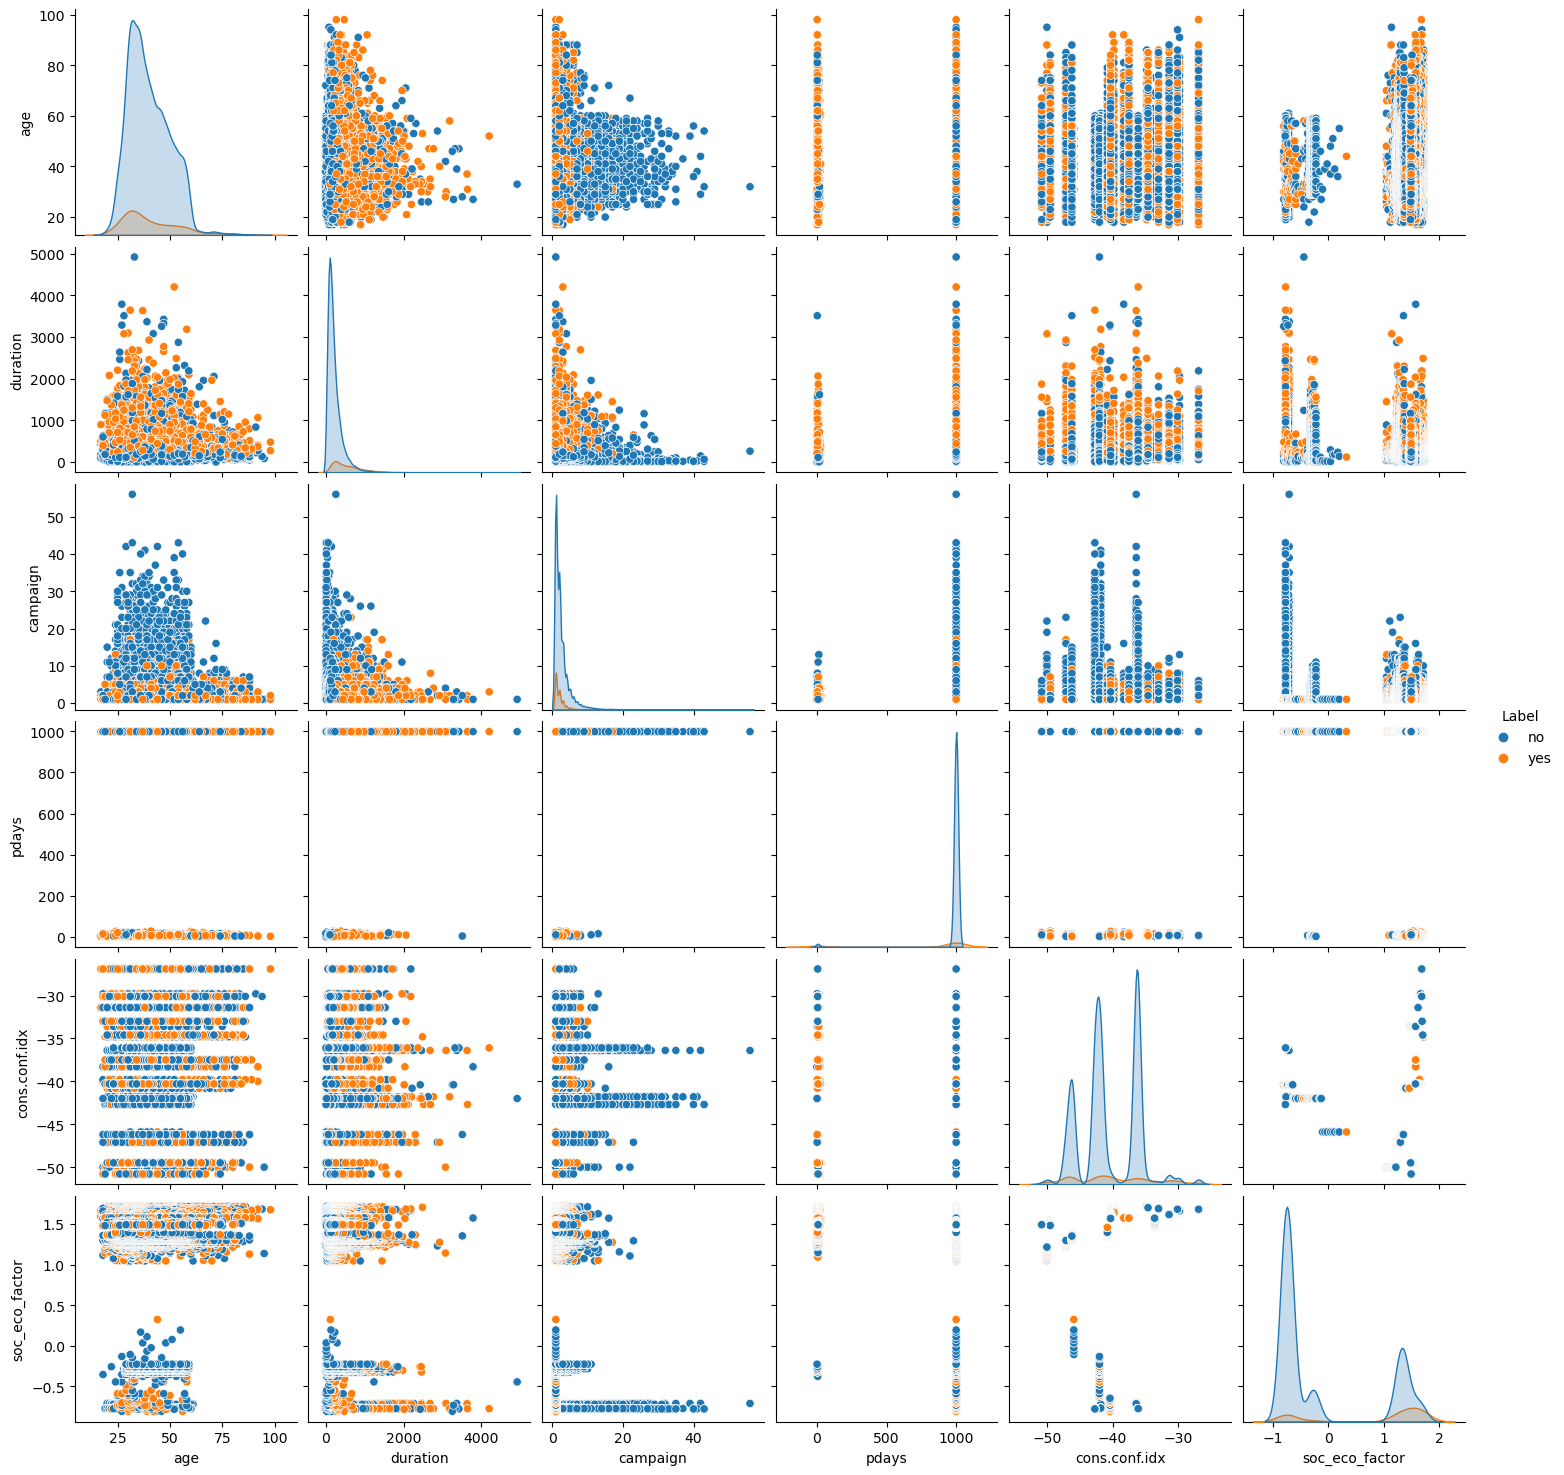

In [208]:
numerical_features_pairplot = ["age", "duration", "campaign", "pdays", "cons.conf.idx", "soc_eco_factor", "Label"]
sns.pairplot(df[numerical_features_pairplot], hue = "Label")

### Conclusion: Visualization
1. **Countplot of Categorical Variables**: This plot gives us the skewness of the data distribution. 
2. **Histogram of Categorical Variables**: This plot gives us the percentage of succesful bank campaigns based on the feature values. A Feature that stand out based on this plot that is the `poutcome` 
3. **Boxplot** : The box plot shows us the high leverage data points that lie beyond the Whiskers. 
3. **Histogram of the pdays column**: Even though the pdays column is a numerical column, it almost behaves as a categorical variable, with the data heavily skewed towards the largest value
4. **Correlation plot**: The correlation plot is a plot that compares how a variable changes compared to another variable, for numerical plots. The closer the value is to 1, the more the corrlation is. The variables `emp.var.rate`, `cons.price.idx`, `euribor3m`, `nr.employed` are highly correlated. Hence including all of them might cause **Multi-collinearity** issues in the model. We factor analyse these features and then combine all the features into 1 feature.

## #4 Model Training and Feature Selection

We will now analyze which model is best suited for the given task. We take the following alternatives and apply the respective Feature Selection Techniques:
1. `SVM (Support Vector Machine)` -> `Feed Forward Feature Selection`
2. `Logistic Regression` &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp; -> `Feed Backward Feature Selection`
3. `Random Forests` &ensp;&ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp;&ensp;&ensp;&ensp;-> `Gini Impurity (Inbuilt Feature Selection)`

We will then use **RandomizedSearchCV** and **Ridge Rigression** to tune the hyperparameters of the model

#### One Hot Encoding the categorical variables
Since we want to handle the categories in a **Nominal** form and not an **Ordinal** form, i.e not rank the categories and instead treat them as individual features, we will one-hot encode them.

In [209]:
# We can observe the features that need the one-hot encoding transformation, and the ones that need to be standard scaled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  cons.conf.idx   41188 non-null  float64
 16  Label           41188 non-null  object 
 17  soc_eco_factor  41188 non-null 

In [210]:
# Split data into X features and y label
X = df[ numerical2 + categorical]
y = df["Label"]
y = y.replace({"yes":1, 
                "no":0})

In [211]:
# Split the dataset using Holdout cross validation, later using Nested Cross Validation during training.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3, stratify=y)

In [212]:
# Create the Pandas dummies (1 hot encodings) for the whole dataset
X_encoded = pd.get_dummies(X, columns= categorical)
X_encoded.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,soc_eco_factor,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,-36.4,-0.709946,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,-36.4,-0.709946,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,-36.4,-0.709946,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,-36.4,-0.709946,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,-36.4,-0.709946,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Make the KFold variable and specify then number of splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# A] Support Vector Classifier (SVC)

In [308]:
# Make a function that returns a Sklearn pipeline object containing Transformers and SVC model, given input features
def get_model(features):
    categorical_features = [ col for col in features if col in categorical]
    numerical_features = [col for col in features if col in numerical2]

    return make_pipeline(
        ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(), categorical_features),
            ('numerical', StandardScaler(), numerical_features)
        ]),
        SVC(random_state=42, kernel='rbf', probability= True))

In [ ]:
# For SVM, a smaller dataset will lead to lesser computational time, so we will sample 25% of the Traning Set
df_sample = pd.concat([X_train,y_train], axis= 1)
df_sample = df_sample.sample(frac=0.25,random_state=42)
y_train_sample = df_sample['Label']
X_train_sample = df_sample.drop(['Label'],axis = 1)

In [ ]:
# We can see the sample is roughly stratified according to the total dataset, and is representative of the class imbalance
print("Probability of getting Class 1 in Total Dataset",df['Label'].value_counts()[1]/len(df))
print("Probability of getting Class 1 in Sampled Dataset",y_train_sample.value_counts()[1]/len(y_train_sample))

In [ ]:
class Solution:
    features = list()
    f1 = 0

    def __init__(self, y):
        # pred = ["no"] * len(y)
        pred = [0] * len(y)
        # self.f1_score = f1_score(y, pred,pos_label= 'yes')
        self.f1 = metrics.f1_score(y, pred,pos_label= 1)
        # self.f1_score = accuracy_score(y, pred)
        # self.mse = np.square(np.subtract(y,[y.mean()]*len(y))).mean() 

    def update(self, features, f1):
        if f1 > self.f1:
            self.features = features
            self.f1 = f1
            return True
        return False

all_features = numerical2 + categorical
# all_features = numerical2
current_features = list() #start with empty model
best = Solution(y_train_sample) #initialize solution
while current_features != all_features: #We're reducing the number of features to be used
    selected_feature = None
    print('Feature List to select from', (set(all_features) - set(current_features)))
    for feature in set(all_features) - set(current_features):
        new_features = current_features + [feature] #add one feature at a time
        print("New features:", new_features)
        f1_scores = cross_val_score(
            estimator=get_model(new_features),
            X=X_train_sample[new_features], y=y_train_sample,
            cv=kfold, scoring='f1')
        f1 = np.average(f1_scores)
        
        if best.update(new_features, f1):
            selected_feature = feature
            
    if selected_feature:
        current_features.append(selected_feature)
        print("         New and Improved Feature Set:", current_features, "\n         With F1 Score:", best.f1)

    else:
        break

Using feedforward feature selection on the randomly sampled dataset, we finalize the following features: <br>
**['pdays', 'duration', 'soc_eco_factor', 'month', 'contact']**

In [309]:
# Pass the best features into a list
feed_forward_features = ['pdays', 'duration', 'soc_eco_factor', 'month', 'contact']

##  Hyper Parameter Tuning
We will now use `RandomisedSearchCV` to select the optimal paramters for the SVC model and then test on the test dataset
We can optimize the following paramters in the SVC model:
1. C : [0.5,1,10]
2. gamma : [scale : 1, 0.1, 0.01, 0.001]
3. Kernel: [rbf]

In [310]:
# Select only the best features from the feedforward feature selection
X_train_best_features = X_train[feed_forward_features]

In [311]:
# Now we create the Param Grid to retrain the dataset based on random subsets of the parameters and select the best performing model.

param_grid = [ 
    {'svc__C': [0.5,1,10] ,
    'svc__gamma': ['scale', 1, 0.1, 0.01, 0.001]
    #  , 'svc__kernel': ['rbf', 'poly']
     },
]
# clf = get_model(feed_forward_featues)  //If you want to access individual pipeline steps
# clf1 = Pipeline(clf.steps[0])
# clf2 = Pipeline(clf.steps[1])
optimal_params = RandomizedSearchCV(get_model(feed_forward_features),
                                    param_grid,
                                    cv = 3,
                                    scoring= 'f1')

optimal_params.fit(X_train_best_features,y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               OneHotEncoder(),
                                                                               ['month',
                                                                                'contact']),
                                                                              ('numerical',
                                                                               StandardScaler(),
                                                                               ['pdays',
                                                                                'duration',
                                                                                'soc_eco_factor'])])),
                                             ('svc',
                                              SVC(probability=True,
                                                  random_state=42))]),
                   param_distributions=[{'svc__C': [0.5, 1, 10],
                                         'svc__gamma': ['scale', 1, 0.1, 0.01,
                                                        0.001]}],
                   scoring='f1')

In [37]:
# Print the parameters and score outputted by the Random Search CV
print("Best Parameters:",optimal_params.best_params_)
print("Best Score:",optimal_params.best_score_)

Best Parameters: {'svc__gamma': 1, 'svc__C': 0.5}
Best Score: 0.5493827522954904


In [38]:
### Now calculate the predictions and compute Confusion Matrix
y_pred = optimal_params.predict(X_test[feed_forward_features])
print("Accuracy Metric: %0.2f score " % (accuracy_score(y_test,y_pred)))
print("Precision Metric: %0.2f score" % (precision_score(y_test,y_pred)))
print("Recall Metric: %0.2f score " % (recall_score(y_test,y_pred)))
print("F1 Metric: %0.2f score" % (f1_score(y_test,y_pred)))

Accuracy Metric: 0.92 score 
Precision Metric: 0.68 score
Recall Metric: 0.48 score 
F1 Metric: 0.56 score


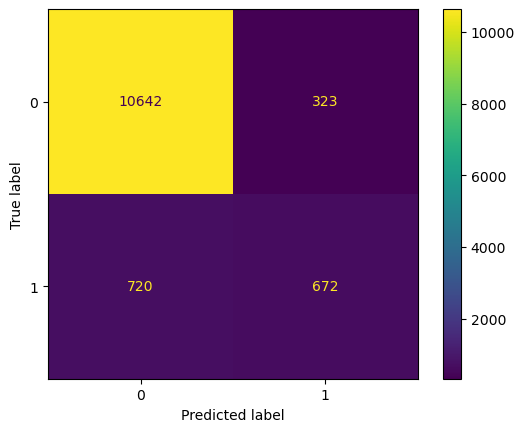

In [39]:
cm = confusion_matrix(y_test,y_pred, labels=optimal_params.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= optimal_params.classes_)
disp.plot()
plt.show()

### Model Insights: **Support Vector Classifier**

We can see the SVC model performs generally well out-of-the-box, because even with the Random Search Cross Validation, the performance is not improved drastically. <br>

The model chooses the `Radial Basis Function` as the default kernel, which maps infinite dimensions between each data point, without actually transforming the data. This is known as the `"Kernel Trick"`, and while it doesn't entail the actual dimension transformations, it is still computationally expensive. <br>
Hence we had to reduce the number of data points to **0.70*0.25 = 18%** of the data for the training of the model. <br>
Employing a Feedforward feature selection method, we find the subset of **['pdays', 'duration', 'soc_eco_factor', 'month', 'contact']** is the best subset. <br>

Then we use RandomSearchCV to get the best estimates of the parameters Gamma and C.
In conclusion, SVC is a good model in this scenario, but the high class imbalance and the non-linear relationships of the data make it difficult for the model to fully separate the positive class.


# B] Logistic Regression

### feature selection with stepwise backward selection

In [40]:
def get_model_binary(features):
    categorical_features = [ col for col in features if col in categorical]
    numerical_features = [col for col in features if col in numerical2]
    #print(categorical_features)

    return make_pipeline(
        ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(), categorical_features),
            ('numerical', StandardScaler(), numerical_features)
        ]),
        LogisticRegression(max_iter=1000))

In [41]:
class Solution:
    features = list()
    f1_score = 0
    
    def __init__(self, y, features=None, f1_score=None):
        if features and f1_score:
            self.features = features
            self.f1_score = f1_score
        else:
            pred = [0] * len(y)
            self.features = list()
            self.f1_score = 0
    
    def update(self, features, f1_score):
        if f1_score > self.f1_score:
            self.features = features
            self.f1_score = f1_score
            return True
        return False

current_features = numerical2 + categorical
print("Current Feature",current_features)
print("All Feature",list(current_features))
best = Solution(
    y=y_train,
    features=current_features,
    f1_score=np.average(
        cross_val_score(
            estimator=get_model_binary(current_features),
            X=X_train, y=y_train, cv=kfold,
            scoring='f1')))

while len(current_features) > 0: #I want to remove features. I stop when the model has 1 feature left
    removed_feature = None
    
    for feature in current_features:
        new_features = [f for f in current_features if f != feature]
        print("New_Features",new_features)
        f1_scores = cross_val_score(
            estimator=get_model_binary(new_features),
            X=X_train[new_features], y=y_train, cv=kfold,
            scoring='f1')
        print("F1_scores",f1_scores)
        f1_avg = np.average(f1_scores)
        print("Average f1_score",f1_avg)
        if best.update(new_features, f1_avg):
            removed_feature = feature
            print("Removed Feature",removed_feature)
            
    if removed_feature:
        current_features.remove(removed_feature)
        print("Current Feature",current_features)
    else:
        break

Current Feature ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
All Feature ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
New_Features ['duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
F1_scores [0.52173913 0.49520154 0.47487002 0.47791165 0.50841121 0.50285714
 0.476      0.53053435 0.50628366 0.54275093]
Average f1_score 0.5036559630661828
Removed Feature age
New_Features ['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
F1

F1_scores [0.51975052 0.50676983 0.48       0.47695391 0.50746269 0.50285714
 0.46987952 0.53231939 0.51346499 0.54104478]
Average f1_score 0.5050502759759233
Removed Feature previous
New_Features ['age', 'duration', 'campaign', 'pdays', 'previous', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']
F1_scores [0.5125     0.49122807 0.46584939 0.47887324 0.51111111 0.49904762
 0.47272727 0.53256705 0.51612903 0.54003724]
Average f1_score 0.5020070025552694
New_Features ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']
F1_scores [0.46781116 0.43531828 0.41391941 0.44813278 0.47378641 0.5
 0.45491803 0.46122449 0.42412451 0.47081712]
Average f1_score 0.45500521925457277
New_Features ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'marital', 'education', 'default', 'housin

F1_scores [0.5308642  0.51837524 0.47916667 0.48       0.50740741 0.50570342
 0.48303393 0.52272727 0.51162791 0.52651515]
Average f1_score 0.5065421198792565
Removed Feature loan
New_Features ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week']
F1_scores [0.52210526 0.47619048 0.45907473 0.46653144 0.48484848 0.48863636
 0.44490644 0.5078125  0.48979592 0.51407129]
Average f1_score 0.4853972918924468
New_Features ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
F1_scores [0.52066116 0.51538462 0.47735192 0.472      0.49626866 0.50474383
 0.47082495 0.51893939 0.5045045  0.52091255]
Average f1_score 0.5001591574189815
Current Feature ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing

In [42]:
feed_backward_features=list(best.features)
feed_backward_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.conf.idx',
 'soc_eco_factor',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'month',
 'day_of_week']

In [43]:
# Select only the best features from the feedforward feature selection
X_train_best_features_binary = X_train[feed_backward_features]

## Hyperparameter Tuning for Logistics Regression
We will now use `GridSearchCV` to select the optimal paramters for the LogisticsRegression model and then test on the test dataset
We can optimize the following paramters in the LogisticsRegression model:<br>
solvers = ['newton-cg', 'lbfgs', 'liblinear']<br>
penalty = ['l2']<br>
c_values = [100, 10, 1.0, 0.1, 0.01]

In [44]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(logisticregression__solver=solvers,logisticregression__penalty=penalty,logisticregression__C=c_values)
grid_search = GridSearchCV(get_model_binary(feed_backward_features), grid, cv=3, scoring='f1')
grid_result = grid_search.fit(X_train_best_features_binary, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.506170 using {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
0.506077 (0.012253) with: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
0.506077 (0.012253) with: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
0.506077 (0.012253) with: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
0.506170 (0.012146) with: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
0.506170 (0.012146) with: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
0.506170 (0.012146) with: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
0.505346 (0.010632) with: {'logisticregression__C': 1.0, '

In [45]:
# Print the parameters and score outputted by the Random Search CV
print("Best Parameters:",grid_result.best_params_)
print("Best Score:",grid_result.best_score_)

Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
Best Score: 0.5061703344950322


In [46]:
### Now calculate the predictions and compute Confusion Matrix
import sklearn
X_test_binary = X_test[feed_backward_features]
y_pred = grid_result.predict(X_test_binary)
print("Accuracy Metric: %0.2f score " % (accuracy_score(y_test,y_pred)))
print("Precision Metric: %0.2f score" % (precision_score(y_test,y_pred)))
print("Recall Metric: %0.2f score " % (recall_score(y_test,y_pred)))
print("F1 Metric: %0.2f score" % (sklearn.metrics.f1_score(y_test,y_pred)))

Accuracy Metric: 0.91 score 
Precision Metric: 0.67 score
Recall Metric: 0.42 score 
F1 Metric: 0.51 score


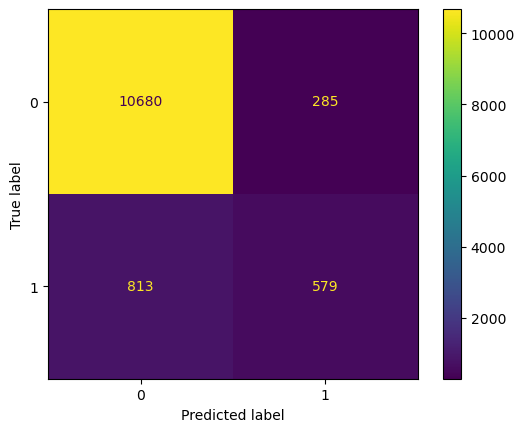

In [47]:
cm = confusion_matrix(y_test,y_pred, labels=grid_result.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= grid_result.classes_)
disp.plot()
plt.show()

### Model Insights: **Logistics Regression Classifier**

Logistic Regression performs nearly as well as the SVC. The model classifies the negative class much better than the SVC but suffers in negative classification implying a tendency to overfit

The model is trained with Ridge Regularization as default, also known as "l2" regularization.
Employing a Backward feature selection method, we find the subset of **['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'soc_eco_factor', 'job', 'marital', 'education', 'default', 'housing', 'month', 'day_of_week']** is the best subset.

It should be noted that the Backward feature selection method employed here returns *14* features as opposed to just *5* in the SVC. The ideal subset may still be unknown and this is due to mere limitation of forward and backward selection methods

Then we use GridSearchCV to get the best estimates of the parameters .

In conclusion, Logistic Regression Classifier performs decent. It shows improvement in classifying the negative class however fares worse than SVC in classifying the minority class

# C] Random Forest Classifier

**Feature selection using Inbuilt Entropy Gain in Random Forest Classifier**

In [393]:
def top_features(X, y, categorical_features, numerical_features):
    # Define the pipeline
    pipeline = make_pipeline(
        ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(), categorical_features),
            ('numerical', StandardScaler(), numerical_features)
        ]),
        RandomForestClassifier(n_estimators=100, random_state=0)
    )
    
    # Fit the pipeline
    pipeline.fit(X, y)
    
    # Get feature importances from the random forest classifier
    feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_
    
    # Get names of all features
    categorical_feature_names = pipeline.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out(input_features=categorical_features)
    all_feature_names = np.array(list(categorical_feature_names) + numerical_features)
    
    # Create a list of tuples containing feature names and their importances
    features_with_importance = [(feature, importance) for feature, importance in zip(all_feature_names, feature_importances)]
    
    # Sort the features by importance
    features_with_importance.sort(key=lambda x: x[1], reverse=True)
    
    # Get the top 10 features and their importances
    top_10_features = [feature for feature, _ in features_with_importance[:10]]
    top_10_importances = [importance for _, importance in features_with_importance[:10]]
    
    return top_10_features, top_10_importances

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    top_n = 10
    top_fi_df = fi_df[:top_n]

    # Define size of bar plot
    plt.figure(figsize=(5, 5))

    # Plot Seaborn bar chart
    sns.barplot(x=top_fi_df['feature_importance'], y=top_fi_df['feature_names'])

    # Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE - Top ' + str(top_n) + ' Features')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')



In [363]:
RF_best_features, RF_feature_importances = top_features(X_train, y_train, categorical, numerical2)

In [364]:
RF_best_features

['duration',
 'soc_eco_factor',
 'age',
 'cons.conf.idx',
 'campaign',
 'pdays',
 'poutcome_success',
 'previous',
 'housing_yes',
 'housing_no']

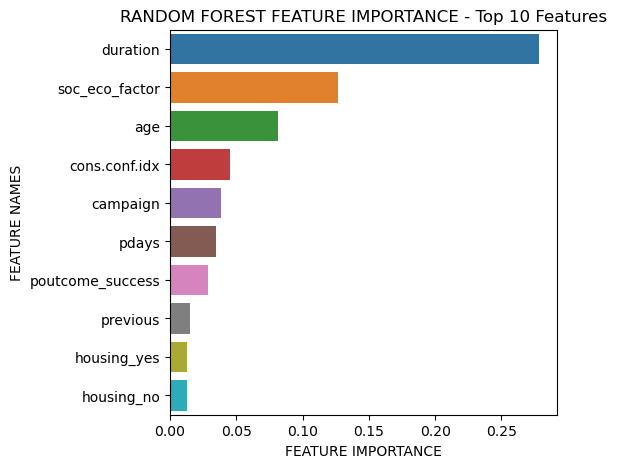

In [365]:
# Assuming RFC and X are defined elsewhere in your code
plot_feature_importance(RF_feature_importances, RF_best_features, 'RANDOM FOREST')
plt.show()

# Hyperparameter tuning

In [366]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical),
        ('num', numerical_transformer, numerical2)
    ], sparse_threshold= 0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [367]:
X_train_preprocessed = pd.DataFrame(pipeline.fit_transform(X_train))
column_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out().tolist() + numerical2
X_train_preprocessed.columns = column_names

In [368]:
X_test_preprocessed = pd.DataFrame(pipeline.fit_transform(X_test))
column_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out().tolist() + numerical2
X_test_preprocessed.columns = column_names

In [369]:
X_train_RF = X_train_preprocessed[RF_best_features]
X_test_RF = X_test_preprocessed[RF_best_features]

In [396]:
param_grid = {
             'n_estimators': [5, 10, 15, 20,100,200],
             'max_samples' : [0.6, 0.7, 0.8, 0.9, 1],
             'bootstrap' : [True, False],
             'criterion' : ['gini', 'entropy'],
             'min_samples_split': [0.1, 0.2, 0.3]
             }
clf_rfc = GridSearchCV(estimator= RandomForestClassifier() ,param_grid= param_grid,scoring= "f1", verbose = False, cv= 5, n_jobs = -1)
best_clf_rfc = clf_rfc.fit(X_train_RF, y_train)

In [397]:
# Print the parameters and score outputted by the Random Search CV
print("Best Parameters:",clf_rfc.best_params_)
print("Best Score:",clf_rfc.best_score_)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_samples': 0.8, 'min_samples_split': 0.2, 'n_estimators': 20}
Best Score: 0.2841457555100779


In [398]:
clf_rfc.fit(X_train_RF, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_samples': [0.6, 0.7, 0.8, 0.9, 1],
                         'min_samples_split': [0.1, 0.2, 0.3],
                         'n_estimators': [5, 10, 15, 20, 100, 200]},
             scoring='f1', verbose=False)

Accuracy Metric: 0.90 score 
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.85      0.04      0.08      1392

    accuracy                           0.89     12357
   macro avg       0.87      0.52      0.51     12357
weighted avg       0.89      0.89      0.84     12357

Confusion Matrix


<Axes: >

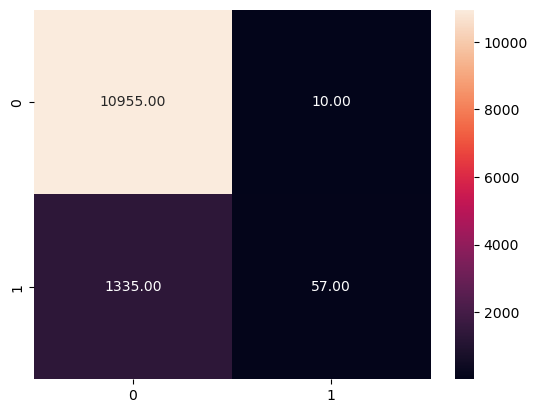

In [399]:
y_pred_RFC = clf_rfc.predict(X_test_RF)

print("Accuracy Metric: %0.2f score " % (accuracy_score(y_test,y_pred)))
print("Classification Report")
print(classification_report(y_test, y_pred_RFC))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt ='.2f')

**Model Insights: Random Forest Classifier**

Random Forest Classifier heavily fits to the imbalanced class. It performs in the same way as Logistic Regression, however performs very poorly on the minority class

We employ inbuilt class for the calculating the feature importance. The feature importance is based on the information gain/ entropy gain by addition of a feature. As Random Forest is a Tree Based Classifier, it makes sense to employ this method for our feature selection. The drawback of this method is that we don't know the number of features to be selected in our subset.

In our model we choose 10 features (intuition based on SVC and Logistic Regression). The best 10 features as per the entropy gain are  **['duration', 'soc_eco_factor', 'age', 'cons.conf.idx', 'campaign', 'pdays', 'poutcome_success', 'previous', 'housing_yes', 'housing_no']**

Then we use GridSearchCV to get the best estimates of the parameters .

In conclusion, Random Forest Classifier overfits heavily. Other metrics must be explored while doing cross validation to get better results, but for comparison purpose, we have refrained to do so.

**COMPARISON OF THE THREE MODELS**

**ROC CURVE**: The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It's created by plotting the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.

The ROC curve visually demonstrates the trade-off between sensitivity and specificity across different threshold values. A classifier with perfect discrimination has an ROC curve that passes through the upper left corner (100% sensitivity and 100% specificity), while a random classifier produces a diagonal line from the bottom left to the top right (with an AUC of 0.5).

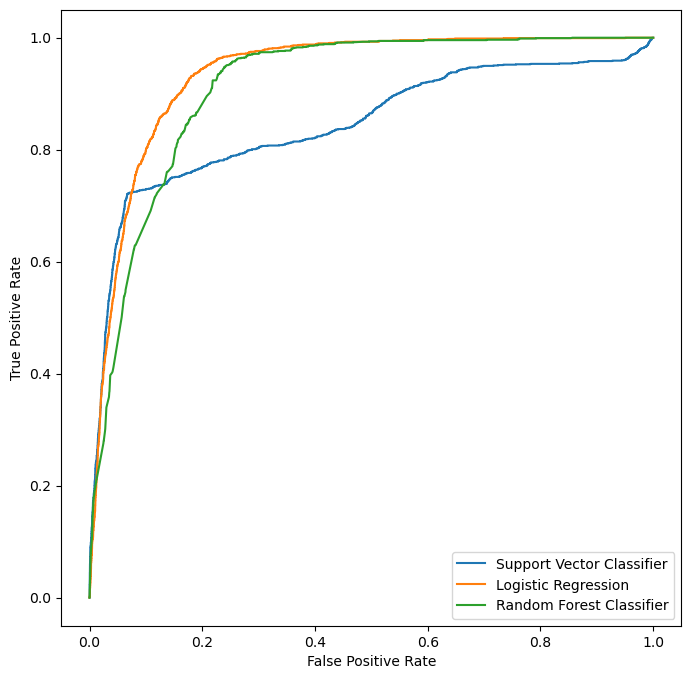

In [402]:
#Plotting the ROC Curve
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, optimal_params.predict_proba(X_test[feed_forward_features])[:,1])
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, grid_result.predict_proba(X_test_binary)[:,1])
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, clf_rfc.predict_proba(X_test_RF)[:, 1])
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(svc_fpr, svc_tpr, label='Support Vector Classifier')
ax.plot(logreg_fpr, logreg_tpr, label='Logistic Regression')
ax.plot(RF_fpr,RF_tpr, label='Random Forest Classifier')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();
plt.show()

# CONCLUSION

From the ROC Curve and Precision Metrics, it is evident that **Logistic Regression** performs the best followed by **Support Vector Classifier** and lastly **Random Forest Classifier**

**The common takeaways from all the three models which can be employed strategically by the Bank to target their outreach are as follows":**
1. Target audience with age <20 or age>60. 
2. Students and retired professionals more prone to sign up for a campaign
3. Customers contacted on cellphone are more susceptible to pay attention to the details of campaign than those at home - contacted by telephone
4. Customers who have previously signed up for the campaign are more likely than not to come onboard due to past positive experiences

**Scope of Improvement in the Project**
1. Treatment of the imbalanced Class: 
It is evident that most of the models deployed faced difficulty in classifying the positive class due to high class imbalance. Due to time constraint, the imbalance was not treated in this project. There are various oversampling and undersampling techniques which could have been tested to make the models perform better on the skewed data

2. Testing different models:
Although the selection of our 3 models were as diverse as posssible; there are various models with more complex formulations which could be tested on this problem. Techniques like ensembling, networks may enhance the end results.
